In [2]:
using Plots

In [18]:
mutable struct Course
    name::String
    prep_days::Int64   
    available::Vector{Int64}
    date::Union{Int64,Nothing}
    Ndays::Int64
    
    function Course(name::String,prep_days::Int64,available::Vector{Int64};date::Union{Int64,Nothing}=nothing,Ndays::Int64=1)
        new(name,prep_days,available,date,Ndays)
    end
end


mutable struct Schedule
    courses::Dict{String,Course}
    names
    dates
    function Schedule(c::Vector{Course})
        courses = Dict{String,Course}()
        for course in c
            courses[course.name] = course
        end
        schedule = new(courses)
        schedule.names = () -> schedule.courses.keys
        schedule.dates = () -> [collect(schedule.courses[i].date:(schedule.courses[i].date+schedule.courses[i].Ndays-1)) for i in findall(x -> !isnothing(x.date),schedule.courses)]
        schedule
    end
end

In [25]:
function apply_prep!(s::Schedule)
    dates = [0; s.dates()...]
    for (name,course) in s.courses
        if course.date === nothing
            for date in dates
                i = findall(x -> x in date:(date+course.prep_days),course.available)
                sort!(i, rev = true)
                for ind in i
                    splice!(course.available,ind)
                end
            end
        else
            for (name,course2) in s.courses
                if course2.date === nothing
                    i = findall(x -> x in (course.date-course.prep_days):course.date,course2.available)
                    sort!(i, rev = true)
                    for ind in i
                        splice!(course2.available,ind)
                    end
                end
            end
        end
    end 
end

function Base.show(io::IO,s::Schedule)
    dates = []
    for (name,course) in s.courses; push!(dates,course.available...); end;
    dates = unique(dates)
    array = zeros(length(s.courses),length(collect(1:max(dates...))))
    i = 0
    names = Array{String,1}()
    for (name,course) in s.courses
        i = i+1
        push!(names,name)
        if course.date === nothing
            array[i,course.available] .= 1
        else
#             array[i,:] .= 1
#             array[i,course.date-course.prep_days:course.date] .= 0
            array[i,course.date:(course.date+course.Ndays-1)] .= 2
        end
    end
#     mycmap = ColorGradient([RGBA(255/255,0/255,0/255),
#     RGBA(0/255,255/255,255/255),
#     RGBA(255/255,255/255,255/255)])
    
    display(heatmap(array,aspect_ratio=:equal,yticks=(collect(1:i),names),
            clim=(0,2),color=cgrad([:red, :green, :yellow]),colorbar=:none,xticks = 1:max(dates...)  ))
end

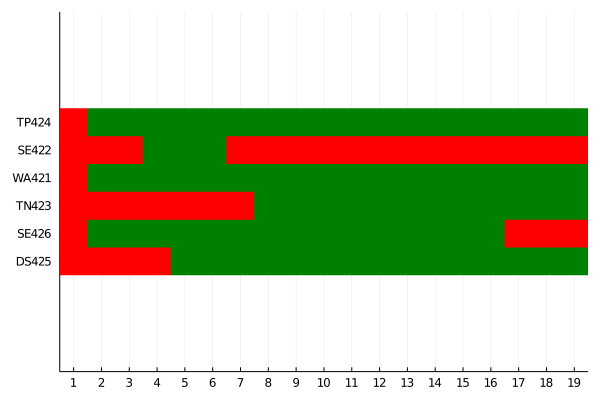

In [26]:
courses = Vector{Course}()
push!(courses,Course("WA421",1,collect(1:19)))
push!(courses,Course("SE422",3,collect(2:6)))
push!(courses,Course("TN423",4,collect(8:19),Ndays=2))
push!(courses,Course("TP424",1,collect(1:19)))
push!(courses,Course("DS425",4,collect(1:19)))
push!(courses,Course("SE426",1,collect(1:16)))

s = Schedule(courses)
apply_prep!(s)
s

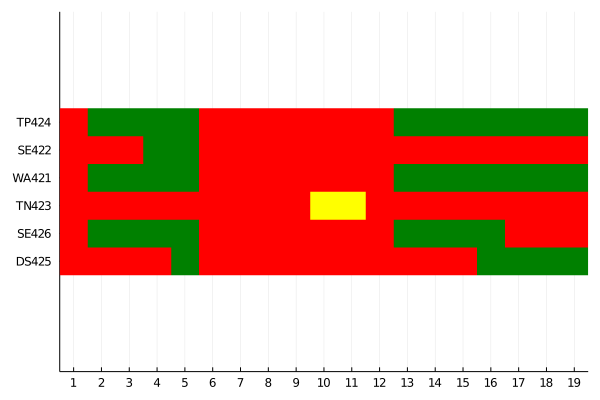

In [27]:
s.courses["TN423"].date = 10
apply_prep!(s)
s